# PyTorch Workflow

1. Prepare and Load the Data
2. Building a Model
3. Fitting the Model to Data (Training)
4. Making Predictions and Evaluating the Model (Inference)
5. Saving and Loading a Model

In [15]:
import torch
from torch import nn # Import all the resources for Neural Network
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

## Data (Preparing and Loading)

Data can be almost anything in machine learning

* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

In [16]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [17]:
len(X), len(y)

(50, 50)

## Spliting Data into training and test

In [18]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualizing our Data

In [19]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_labels, c= "b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})

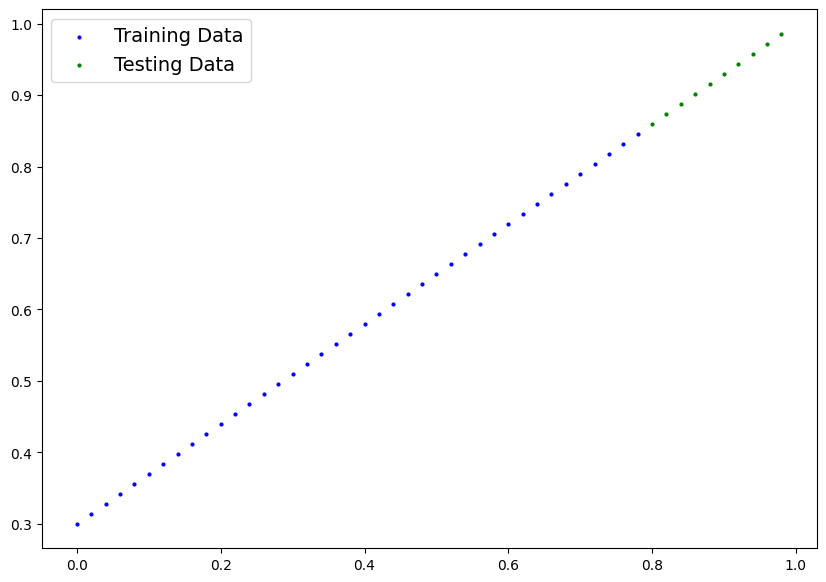

In [20]:
plot_predictions(X_train, y_train)

## Build a PyTorch Model

The weights and bias will be adjustement through backpropagation and gradient descent algorithms

In [21]:
# Create linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherhits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,  # Use Gradient Descent
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True,
                                         dtype = torch.float))
  def forward (self, x: torch.Tensor) -> torch.Tensor: #"x" the input data
    return self.weights * x + self.bias

## PyTorch Model Building Essntials

[PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html#pytorch-cheat-sheet)

* **torch.nn** - Contains all of the buildings for computional graphs (Neural Netowrks can be considered a Computional grpahs)

* **torch.nn.Parameter** - What parameters should our model try and learn, often a PyTorch layer from torch.

* **torch.nn.Module** - The base class for NN modules, if you subclass it, you should overwrite forward()

* **torch.optim** - Optimizers in PyTorch, they will help with gradient descent

* **def forward()** - All nn.Module subclasses rwquire you to overwrite forward(), this method defines what happens in the forward computation

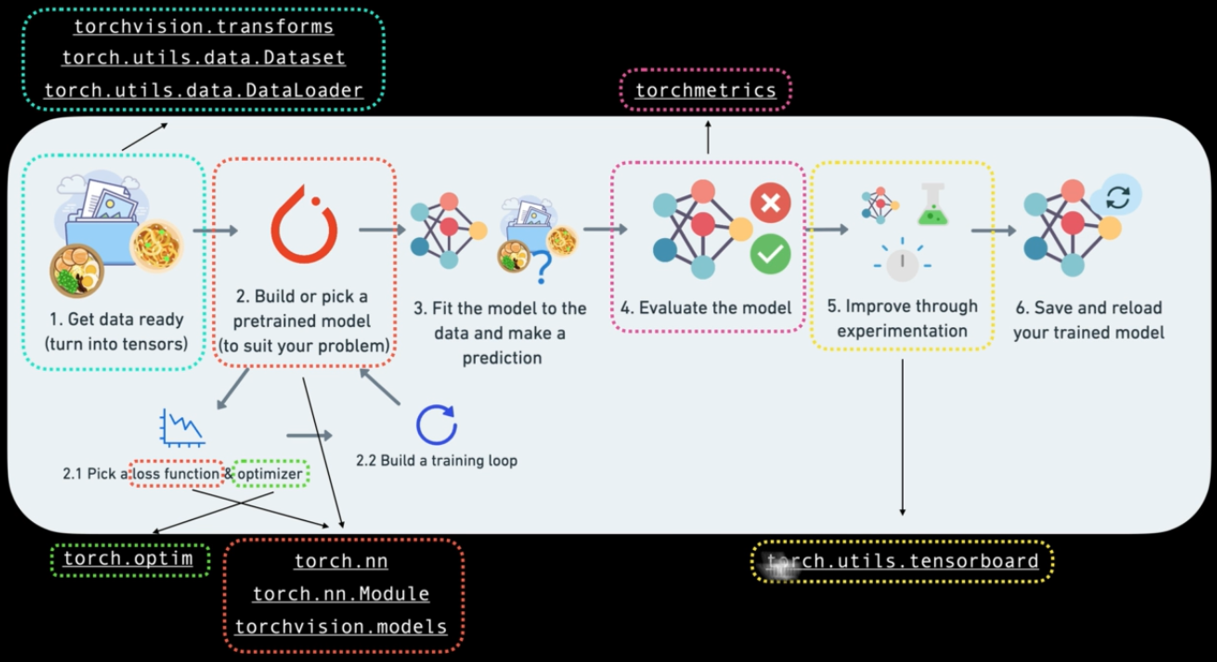

## Checking the contents of our PyTorch model

if we want to check out model parameters or whats inside our model, use .parameters()

In [22]:
# Create a random seed

torch.manual_seed(42)

# Create an instance of the model

model_0 = LinearRegressionModel()
print(list(model_0.parameters()))
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


## Making prediction using "torch.inference_mode()

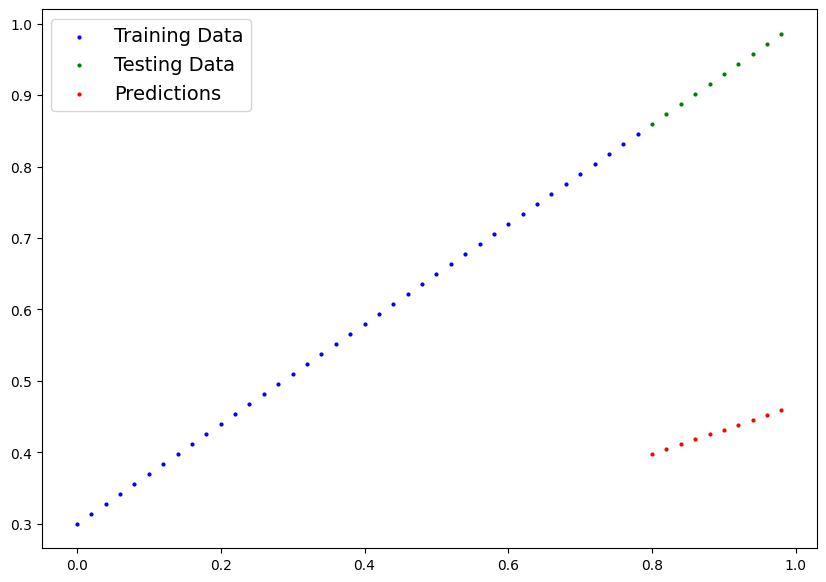

In [23]:
with torch.inference_mode():
  y_preds = model_0(X_test)
# you can do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
plot_predictions(predictions= y_preds)

## Training Process

### Choosing a Loss Function and Optimizer

* **Loss Function**: A function to measure how wrong your models predictions are to the ideal, lower is better

[Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)

* **Optimizer**: Takes into account the loss of a model and adjusts the models parameters

[Optimizer](https://pytorch.org/docs/stable/optim.html)

### Training Loop

1. Loop through the data
2. Forward pass (Data in the Model)
3. Calculate the loss
4. Optimizer
5. Loss backward
6. Optimizer step

In [26]:
# Loss Function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr= 0.01) #learning rate)

In [27]:
# Training Loop

epochs = 1

# 1. Loop through the data

for epoch in range(epochs):
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to

# 2. Forward pass
  y_pred = model_0(X_train)

# 3. Calculate the loss
  loss = loss_fn(y_pred, y_train)

# 4. Optimizer zero grad
  optimizer.zero_grad()

# 5. Perform backpropagatio
  loss.backward()

# 6. Step the optimizer (Gradient Descent)
  optimizer.step()

  model_0.eval() # turns off the gradient tracking


In [29]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3406], requires_grad=True),
 Parameter containing:
 tensor([0.1388], requires_grad=True)]